### MSDM5058 Time Series 2:

Study of some real financial time series.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from itertools import product
from sklearn.preprocessing import scale
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the time series during the period from 2017-11-09 to 2022-02-28

# data = pd.read_csv('cryptocurrency.csv', parse_dates = ['Date'])
data = pd.read_csv('cryptocurrency.csv')
data, data.dtypes

(            Date           BTC          ETH         LTC       XRP
 0     2017-11-09   7143.580078   320.884003   64.269699  0.217488
 1     2017-11-10   6618.140137   299.252991   59.260101  0.206483
 2     2017-11-11   6357.600098   314.681000   62.303299  0.210430
 3     2017-11-12   5950.069824   307.907990   59.005402  0.197339
 4     2017-11-13   6559.490234   316.716003   61.396500  0.203442
 ...          ...           ...          ...         ...       ...
 1568  2022-02-24  38332.609380  2598.067139  104.230492  0.696272
 1569  2022-02-25  39214.218750  2764.535645  109.266312  0.768903
 1570  2022-02-26  39105.148440  2781.111816  108.243660  0.750973
 1571  2022-02-27  37709.785160  2621.801758  103.105598  0.721992
 1572  2022-02-28  43193.234380  2919.201172  113.474579  0.782044
 
 [1573 rows x 5 columns],
 Date     object
 BTC     float64
 ETH     float64
 LTC     float64
 XRP     float64
 dtype: object)

In [3]:
# Change the index to be the datetime format

data['Date'] = pd.to_datetime(data['Date'])
data.index = data.pop('Date')
data

,BTC,ETH,LTC,XRP
Date,,,,
2017-11-09,7143.580078,320.884003,64.269699,0.217488
2017-11-10,6618.140137,299.252991,59.260101,0.206483
2017-11-11,6357.600098,314.681000,62.303299,0.210430
2017-11-12,5950.069824,307.907990,59.005402,0.197339
2017-11-13,6559.490234,316.716003,61.396500,0.203442
...,...,...,...,...
2022-02-24,38332.609380,2598.067139,104.230492,0.696272
2022-02-25,39214.218750,2764.535645,109.266312,0.768903
2022-02-26,39105.148440,2781.111816,108.243660,0.750973


In [4]:
# Fing log returns of the cryptocurrency time series

data_log = pd.DataFrame(data[:], columns = ['BTC', 'ETH', 'LTC', 'XRP']).apply(np.log).apply(np.diff)
data_log.index = data.index[1:]
data_log, data_log.dtypes

(                 BTC       ETH       LTC       XRP
 Date                                              
 2017-11-10 -0.076400 -0.069790 -0.081152 -0.051926
 2017-11-11 -0.040163  0.050270  0.050078  0.018935
 2017-11-12 -0.066248 -0.021758 -0.054385 -0.064230
 2017-11-13  0.097510  0.028204  0.039724  0.030458
 2017-11-14  0.011559  0.063948  0.020683  0.030893
 ...              ...       ...       ...       ...
 2022-02-24  0.027400  0.002971 -0.016513 -0.003547
 2022-02-25  0.022738  0.062105  0.047183  0.099224
 2022-02-26 -0.002785  0.005978 -0.009403 -0.023595
 2022-02-27 -0.036335 -0.058989 -0.048631 -0.039356
 2022-02-28  0.135764  0.107448  0.095825  0.079897
 
 [1572 rows x 4 columns],
 BTC    float64
 ETH    float64
 LTC    float64
 XRP    float64
 dtype: object)

In [5]:
# Use the data as the training period

train_btc = data_log['BTC'].values
train_eth = data_log['ETH'].values
train_ltc = data_log['LTC'].values
train_xrp = data_log['XRP'].values
train_btc = scale(train_btc, with_std = False)
train_eth = scale(train_eth, with_std = False)
train_ltc = scale(train_ltc, with_std = False)
train_xrp = scale(train_xrp, with_std = False)

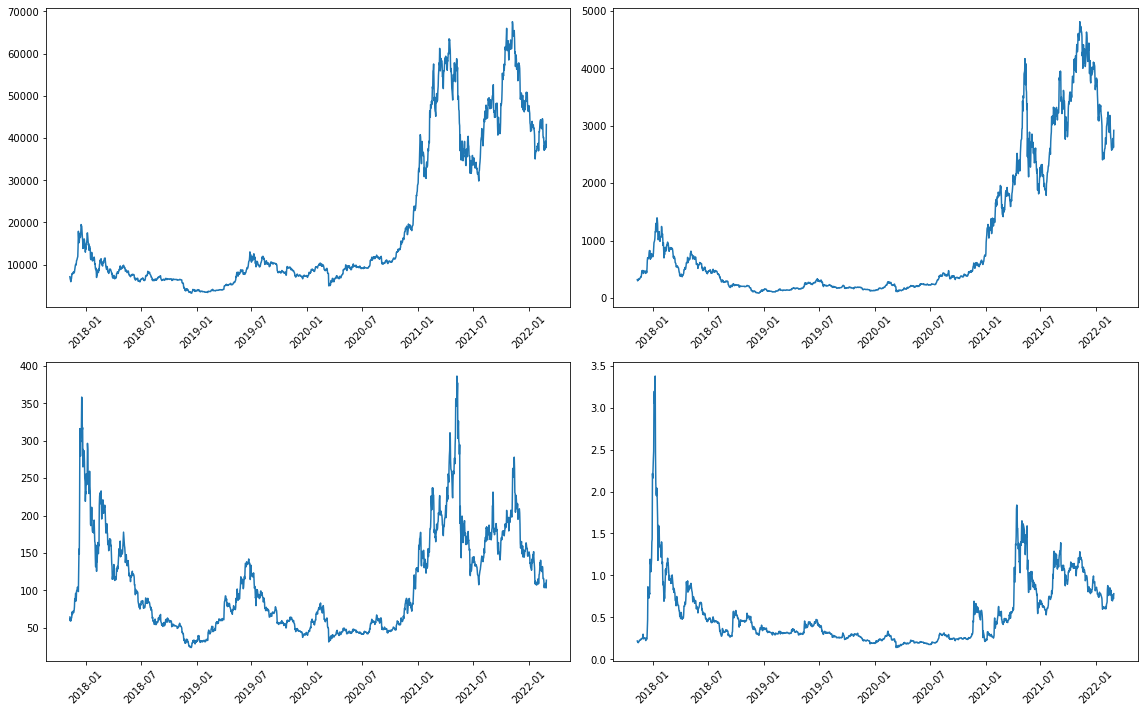

In [6]:
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(10)
plt.subplot(2,2,1)
plt.plot(data.index, data['BTC'])
plt.xticks(rotation = 45)
plt.subplot(2,2,2)
plt.plot(data.index, data['ETH'])
plt.xticks(rotation = 45)
plt.subplot(2,2,3)
plt.plot(data.index, data['LTC'])
plt.xticks(rotation = 45)
plt.subplot(2,2,4)
plt.plot(data.index, data['XRP'])
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [7]:
#Augmented Dickey-Fuller Test to confirm if time series is stationary

ad_fuller_result = adfuller(train_btc)
print('Result of ADF test for Bitcoin:')
print('ADF Statistic:', ad_fuller_result[0]) #Large -ve stats --> reject null, time series stationary
print('p-value:', ad_fuller_result[1]) #p-value smaller than 0.05 --> reject null, time series stationary
print('used lag:', ad_fuller_result[2]) #No. of lags used
print('critical values: ', ad_fuller_result[4]) #Critical values at 1%, 5%, 10%
ad_fuller_result = adfuller(train_eth)
print('\nResult of ADF test for Ethereum:')
print('ADF Statistic:', ad_fuller_result[0]) 
print('p-value:', ad_fuller_result[1]) 
print('used lag:', ad_fuller_result[2])
print('critical values: ', ad_fuller_result[4])
ad_fuller_result = adfuller(train_ltc)
print('\nResult of ADF test for Litcoin:')
print('ADF Statistic:', ad_fuller_result[0]) 
print('p-value:', ad_fuller_result[1]) 
print('used lag:', ad_fuller_result[2])
print('critical values: ', ad_fuller_result[4])
ad_fuller_result = adfuller(train_xrp)
print('\nResult of ADF test for Ripple:')
print('ADF Statistic:', ad_fuller_result[0]) 
print('p-value:', ad_fuller_result[1]) 
print('used lag:', ad_fuller_result[2])
print('critical values: ', ad_fuller_result[4])

Result of ADF test for Bitcoin:
ADF Statistic: -11.4005556644126
p-value: 7.66696158610885e-21
used lag: 9
critical values:  {'1%': -3.434543392468286, '5%': -2.863392129986099, '10%': -2.567756042468289}

Result of ADF test for Ethereum:
ADF Statistic: -11.792993361026175
p-value: 9.726327704451341e-22
used lag: 9
critical values:  {'1%': -3.434543392468286, '5%': -2.863392129986099, '10%': -2.567756042468289}

Result of ADF test for Litcoin:
ADF Statistic: -14.821025602325776
p-value: 1.9635873348029164e-27
used lag: 5
critical values:  {'1%': -3.4345326637419276, '5%': -2.863387394655722, '10%': -2.5677535209080573}

Result of ADF test for Ripple:
ADF Statistic: -8.51759926454763
p-value: 1.1230411587043148e-13
used lag: 17
critical values:  {'1%': -3.434565015890899, '5%': -2.8634016738494283, '10%': -2.567761124577418}


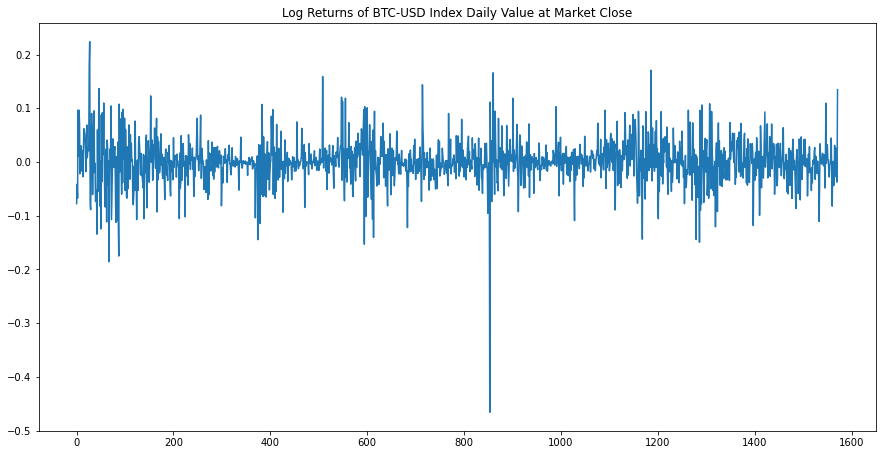

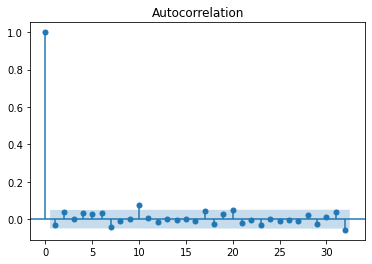

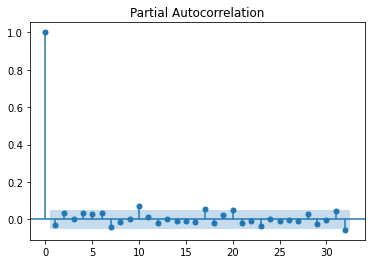

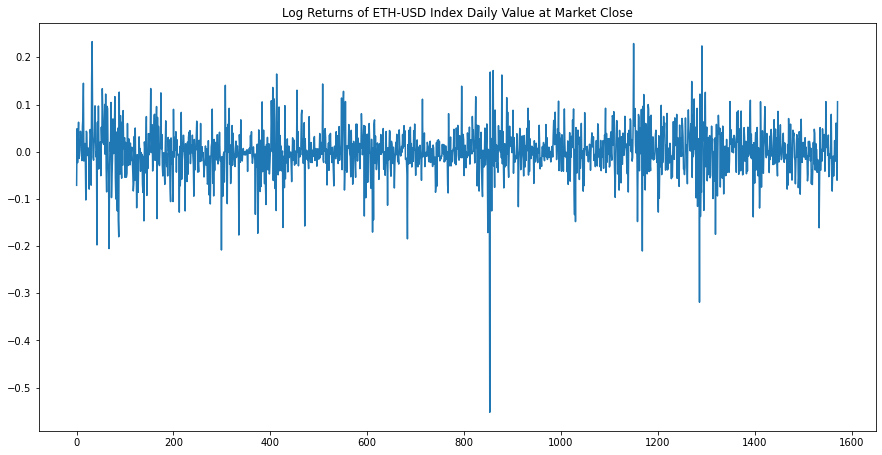

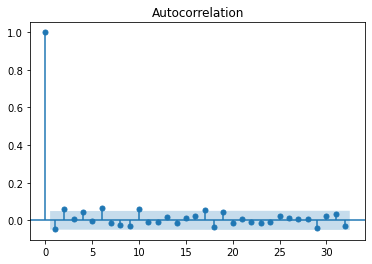

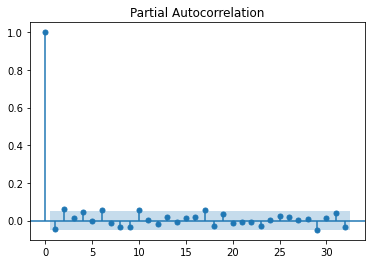

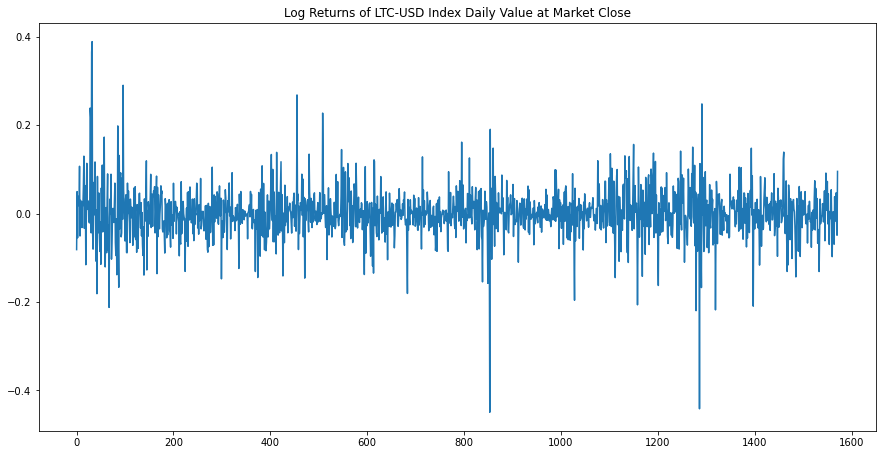

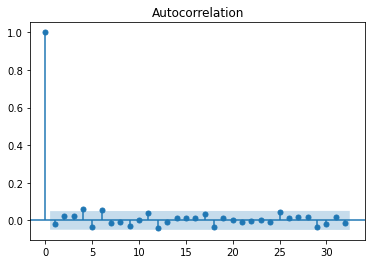

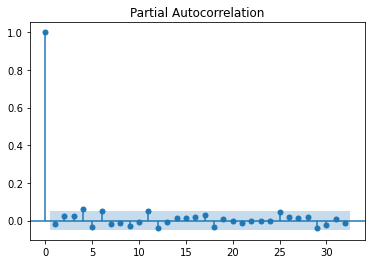

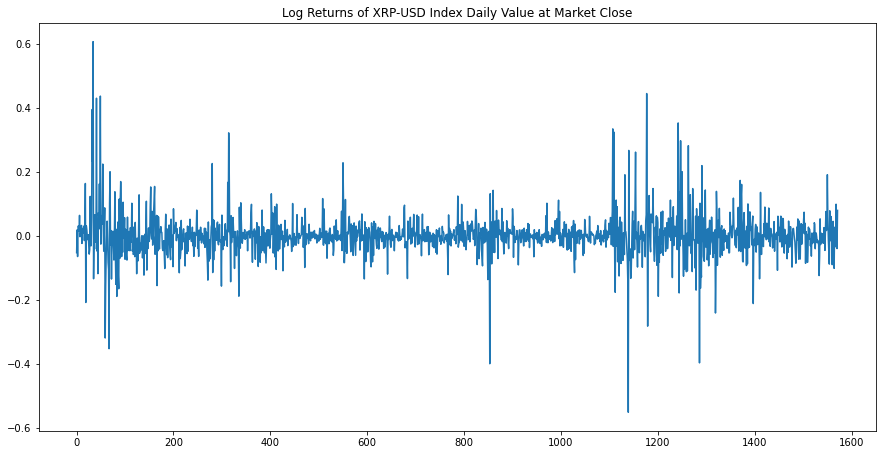

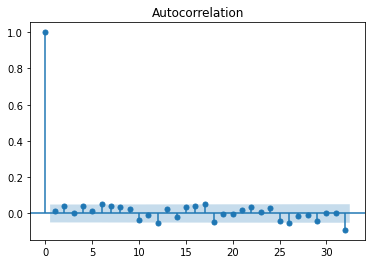

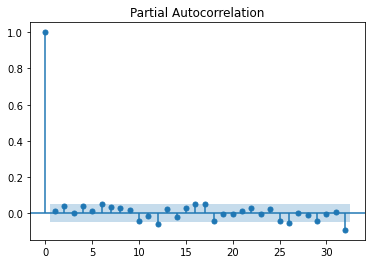

In [8]:
#Plotting the Log returns, ACF and PACF for each of the time series during the training period

plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(train_btc)
plt.title("Log Returns of BTC-USD Index Daily Value at Market Close")

plot_acf(train_btc)
plot_pacf(train_btc)

plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(train_eth)
plt.title("Log Returns of ETH-USD Index Daily Value at Market Close")

plot_acf(train_eth)
plot_pacf(train_eth)

plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(train_ltc)
plt.title("Log Returns of LTC-USD Index Daily Value at Market Close")

plot_acf(train_ltc), plot_pacf(train_ltc)

plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(train_xrp)
plt.title("Log Returns of XRP-USD Index Daily Value at Market Close")

plot_acf(train_xrp)
plot_pacf(train_xrp)
plt.show()

In [9]:
#To determine best order for ARIMA(p,d,q):

def optimize_ARIMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for order in order_list:
        try: 
            model = ARIMA(exog, order = order).fit()
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

# Try combinations with orders (p,q) ranging from 0 to 10, keeping differencing order = d
ps = range(0, 7, 1)
# d = 0
qs = range(0, 7, 1)
# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)
order_list = []
nd = 1           # number of differencing, we don't do any further differencing at the moment
for d in range(nd):
    for each in parameters_list:
        each = list(each)
        each.insert(1, d)
        each = tuple(each)
        order_list.append(each)
    
result_df_btc = optimize_ARIMA(order_list, exog = train_btc)
print(result_df_btc[0:50])
result_df_eth = optimize_ARIMA(order_list, exog = train_eth)
print(result_df_eth[0:50])
result_df_ltc = optimize_ARIMA(order_list, exog = train_ltc)
print(result_df_ltc[0:50])
result_df_xrp = optimize_ARIMA(order_list, exog = train_xrp)
print(result_df_xrp[0:50])

    (p, d, q)          AIC
0   (1, 0, 1) -5537.806780
1   (0, 0, 0) -5537.384132
2   (2, 0, 0) -5537.058631
3   (1, 0, 0) -5537.024287
4   (0, 0, 2) -5536.929500
5   (0, 0, 1) -5536.893193
6   (3, 0, 6) -5535.871136
7   (1, 0, 2) -5535.764946
8   (2, 0, 2) -5535.535868
9   (4, 0, 3) -5535.440397
10  (3, 0, 4) -5535.308119
11  (2, 0, 1) -5535.052569
12  (3, 0, 0) -5535.048939
13  (0, 0, 3) -5534.931709
14  (0, 0, 4) -5534.820458
15  (4, 0, 0) -5534.759878
16  (3, 0, 2) -5534.592504
17  (4, 0, 4) -5534.486365
18  (2, 0, 6) -5534.466737
19  (4, 0, 5) -5534.295894
20  (0, 0, 5) -5534.264895
21  (5, 0, 0) -5534.163955
22  (1, 0, 4) -5534.112885
23  (6, 0, 0) -5534.057823
24  (3, 0, 5) -5533.964378
25  (2, 0, 4) -5533.896447
26  (2, 0, 3) -5533.833632
27  (4, 0, 6) -5533.777361
28  (5, 0, 3) -5533.640486
29  (0, 0, 6) -5533.543286
30  (6, 0, 1) -5533.302135
31  (1, 0, 3) -5533.130484
32  (3, 0, 1) -5533.050826
33  (2, 0, 5) -5532.900226
34  (4, 0, 1) -5532.807197
35  (5, 0, 1) -5532.651694
3

In [10]:
# Find the coefficients of the fitted model for Bitcoin, using ARMA (1, 1) as an example

btc_result = ARIMA(train_btc, order=(1, 0, 1), trend = 'c').fit() 
print(btc_result.summary())
btc_lb_result = acorr_ljungbox(btc_result.resid, return_df=True)
print(btc_lb_result)

print("\nMake forecast of the Log returns for the test period: ")
print(btc_result.forecast(steps = 7))

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1572
Model:                 ARIMA(1, 0, 1)   Log Likelihood                2772.903
Date:                Wed, 04 May 2022   AIC                          -5537.807
Time:                        21:05:30   BIC                          -5516.366
Sample:                             0   HQIC                         -5529.838
                               - 1572                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.628e-06      0.001     -0.005      0.996      -0.002       0.002
ar.L1         -0.8262      0.135     -6.137      0.000      -1.090      -0.562
ma.L1          0.7961      0.144      5.538      0.0

In [11]:
# Put the four one-dimensional cryptocurrency arrays into one two-dimensional array

crypto_combine = np.vstack((train_btc, train_eth, train_ltc, train_xrp)).T
crypto_combine.shape, crypto_combine

((1572, 4),
 array([[-0.07754438, -0.07119493, -0.08151366, -0.05273969],
        [-0.04130812,  0.04886552,  0.0497165 ,  0.01812087],
        [-0.06739271, -0.02316299, -0.05474701, -0.0650441 ],
        ...,
        [-0.00392997,  0.00457353, -0.00976497, -0.02440923],
        [-0.03747922, -0.06039358, -0.04899275, -0.04016974],
        [ 0.13461956,  0.10604366,  0.09546352,  0.07908285]]))

In [12]:
#To determine best order for VARMAX(p, q):

def optimize_VARMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for order in order_list:
        try: 
            model = sm.tsa.VARMAX(crypto_combine, order = order, trend='n').fit()
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

# Try combinations with orders (p,q) ranging from 0 to 10, keeping differencing order = d
ps = range(0, 5, 1)
# d = 0
qs = range(0, 5, 1)
# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)
order_list = []
for each in parameters_list:
    each = list(each)
    each = tuple(each)
    order_list.append(each)
    
var_crypto_result = optimize_VARMA(order_list, exog = crypto_combine)
print(var_crypto_result[0:50])

    (p, q)           AIC
0   (0, 2) -23292.581195
1   (2, 0) -23291.956287
2   (4, 0) -23286.954899
3   (3, 0) -23285.875469
4   (0, 3) -23283.102717
5   (1, 0) -23276.120383
6   (0, 4) -23273.399702
7   (0, 1) -23266.202905
8   (1, 2) -23264.561741
9   (2, 1) -23260.348982
10  (4, 1) -23259.067216
11  (1, 3) -23257.318023
12  (3, 1) -23254.242392
13  (1, 1) -23251.841849
14  (1, 4) -23249.972166
15  (2, 2) -23232.699437
16  (4, 2) -23226.547704
17  (2, 3) -23224.624127
18  (3, 2) -23223.568833
19  (2, 4) -23220.025616
20  (4, 3) -23196.875558
21  (3, 3) -23195.918574
22  (3, 4) -23192.469301
23  (4, 4) -23169.275316


In [13]:
var_crypto_result = sm.tsa.VARMAX(crypto_combine, order=(2,0), trend = 'c').fit()
print(var_crypto_result.summary())

                              Statespace Model Results                              
Dep. Variable:     ['y1', 'y2', 'y3', 'y4']   No. Observations:                 1572
Model:                               VAR(2)   Log Likelihood               11687.978
                                + intercept   AIC                         -23283.956
Date:                      Wed, 04 May 2022   BIC                         -23037.391
Time:                              21:15:51   HQIC                        -23192.317
Sample:                                   0                                         
                                     - 1572                                         
Covariance Type:                        opg                                         
Ljung-Box (L1) (Q):     0.01, 0.00, 0.02, 0.01   Jarque-Bera (JB):   10937.66, 3170.49, 7541.20, 65917.82
Prob(Q):                0.92, 0.97, 0.88, 0.93   Prob(JB):                         0.00, 0.00, 0.00, 0.00
Heteroskedasticity (H):